In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import importlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

import diffvert
import diffvert.models.NDIVE

import diffvert.evaluation.plot_helpers as ph
import diffvert.utils.data_format as daf
from functools import partial
import seaborn as sns
import mpl_toolkits.axisartist as axisartist

importlib.reload(diffvert.evaluation.plot_helpers)
import diffvert.evaluation.plot_helpers as ph


In [3]:
ndive_outs = ph.get_test_output("original_NDIVE_final_ndive_only_old_samples")
new_ndive_outs =  ph.get_test_output("Zenodo_Lettuce_small_final_ndive_only/2") # must be evaluated on Lettuce bc extra config settings - here load cached outputs only

found previous cached outputs
found previous cached outputs


In [4]:
MAX_NUM_TRACKS = 15
MODEL_INPUT_SHAPE = [10,MAX_NUM_TRACKS,51]
INCLUDE_GHOST = False

In [5]:
#plt.rcParams["font.size"]=15
plt.rcParams['font.size'] = 17
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
threshold=0.5
fc=0.05
efficiency_lower_bound=0.6

In [6]:
purity_color="#EE3377"
efficiency_color="black"
bjet_color="#009988"
cjet_color="#33BBEE"
ujet_color="#EE3377"

In [7]:
#def get_x_zscore(outputs, inputs, has_ghost=True):
#    """ return z score for vertex x output """
#    return (outputs[:,daf.JetPrediction.VERTEX_X] - inputs[:,0,daf.JetData.HADRON_X]) \
#            / np.sqrt(outputs[:,daf.JetPrediction.VERTEX_COV_XX])

#def get_z_zscore(outputs, inputs, has_ghost=True):
#    """ return z score for vertex z output """
#    return (outputs[:,daf.JetPrediction.VERTEX_Z] - inputs[:,0,daf.JetData.HADRON_Z]) \
#            / np.sqrt(outputs[:,daf.JetPrediction.VERTEX_COV_ZZ])

def get_x_zscore(outputs, inputs, has_ghost=True):
    """ return z score for vertex x output """
    
    mask = np.sum(abs(inputs[:,:,daf.JetData.TRACK_PROD_VTX_Z] \
                         - np.repeat(inputs[:,0,daf.JetData.HADRON_Z],15,axis=0).reshape(inputs.shape[0],15))<1e-3 ,axis=1)
    return (outputs[mask>=2][:,daf.JetPrediction.VERTEX_X] \
            - inputs[mask>=2][:,0,daf.JetData.HADRON_X]) \
            / np.sqrt(outputs[mask>=2][:,daf.JetPrediction.VERTEX_COV_XX])

def get_x_diff(outputs, inputs, has_ghost=True):
    """ return z score for vertex x output """
    
    mask = np.sum(abs(inputs[:,:,daf.JetData.TRACK_PROD_VTX_Z] \
                         - np.repeat(inputs[:,0,daf.JetData.HADRON_Z],15,axis=0).reshape(inputs.shape[0],15))<1e-3 ,axis=1)
    return (outputs[mask>=2][:,daf.JetPrediction.VERTEX_X] \
            - inputs[mask>=2][:,0,daf.JetData.HADRON_X]) 

def get_z_zscore(outputs, inputs, has_ghost=True):
    """ return z score for vertex z output """
    
    mask = np.sum(abs(inputs[:,:,daf.JetData.TRACK_PROD_VTX_Z] \
                         - np.repeat(inputs[:,0,daf.JetData.HADRON_Z],15,axis=0).reshape(inputs.shape[0],15))<1e-3 ,axis=1)
    return (outputs[mask>=2][:,daf.JetPrediction.VERTEX_Z] \
            - inputs[mask>=2][:,0,daf.JetData.HADRON_Z]) \
            / np.sqrt(outputs[mask>=2][:,daf.JetPrediction.VERTEX_COV_ZZ])

def get_z_diff(outputs, inputs, has_ghost=True):
    """ return z score for vertex z output """
    
    mask = np.sum(abs(inputs[:,:,daf.JetData.TRACK_PROD_VTX_Z] \
                         - np.repeat(inputs[:,0,daf.JetData.HADRON_Z],15,axis=0).reshape(inputs.shape[0],15))<1e-3 ,axis=1)
    return (outputs[mask>=2][:,daf.JetPrediction.VERTEX_Z] \
            - inputs[mask>=2][:,0,daf.JetData.HADRON_Z]) 

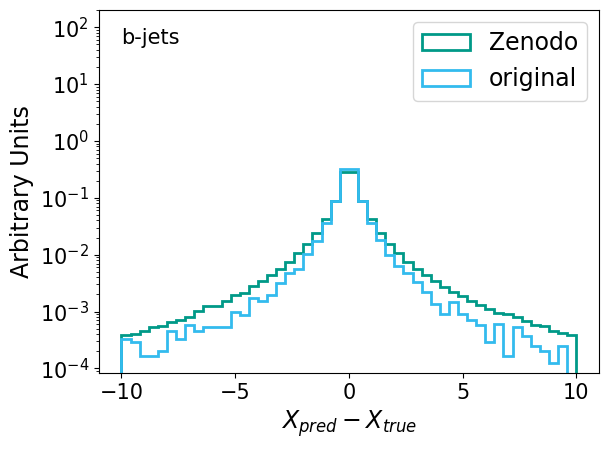

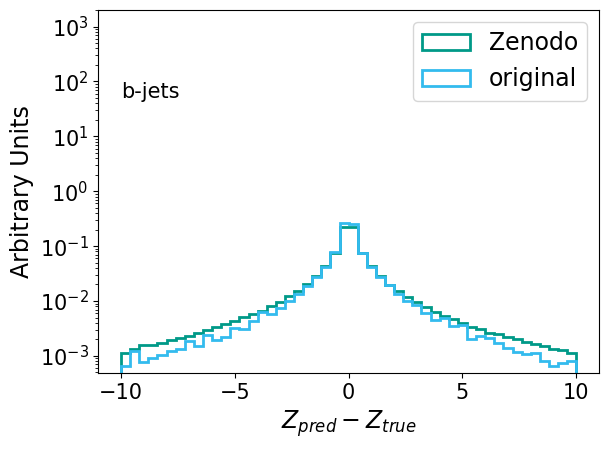

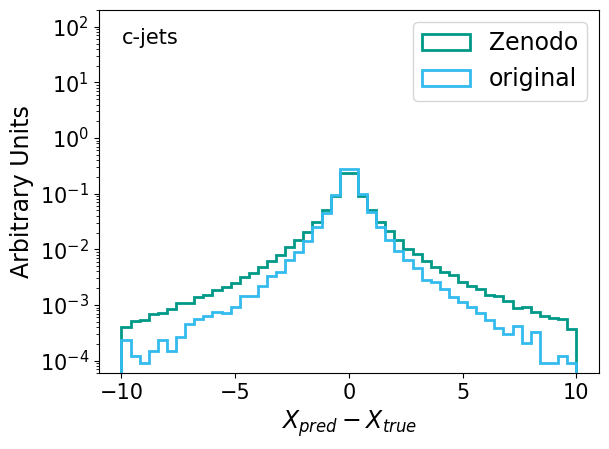

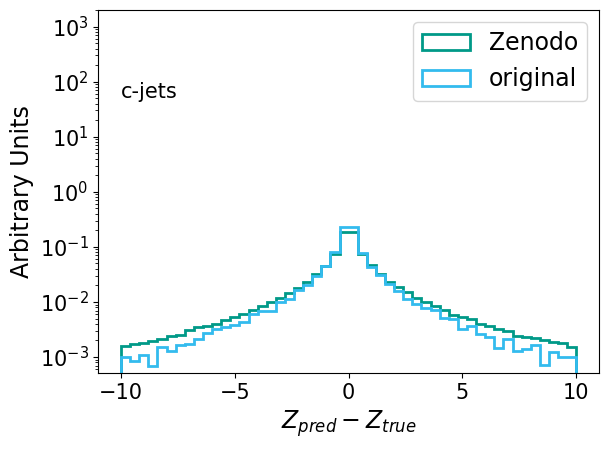

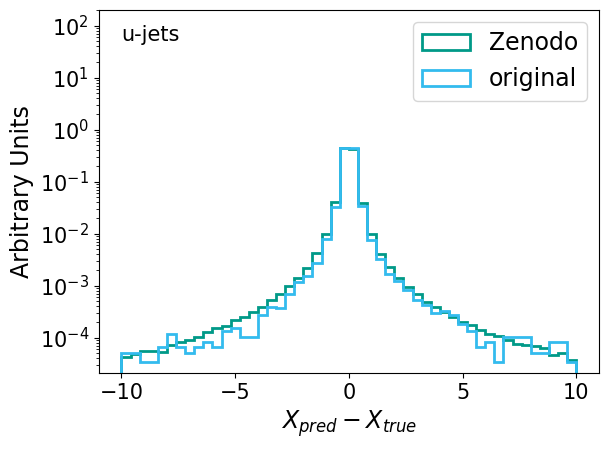

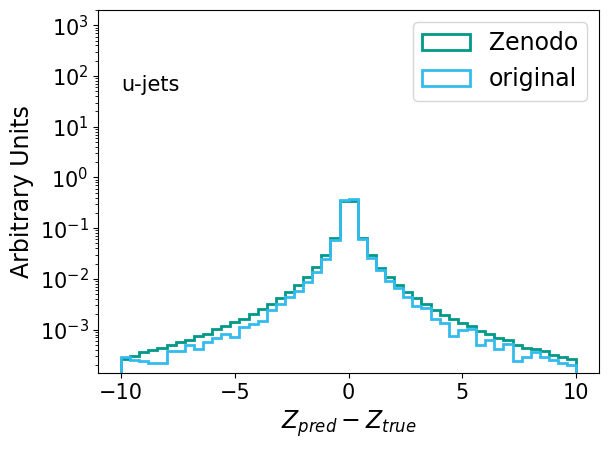

In [8]:
fig, ax1 = plt.subplots(1)#,3, figsize=(20,6))
hist_options = dict(range=(-10, 10), bins=50, log=True, density=False)
hist_options["linewidth"]=2

ph.graph_output_info(
    get_x_diff,
    ax1,
    outs_list=[new_ndive_outs["b_output_arr"], ndive_outs["b_output_arr"]],#, ndive_pfts_outs["b_output_arr"]],
    ins_list=[new_ndive_outs["b_input_arr"], ndive_outs["b_input_arr"]],#, ndive_pfts_outs["b_input_arr"]],
    hist_options=hist_options,
    colors=[bjet_color, cjet_color],
    linestyles=["-", "-"],
    labels=["Zenodo", "original"],
    has_ghost=INCLUDE_GHOST,
    plot_avgs=False,
)

ax1.set_ylabel("Arbitrary Units")
ax1.set_xlabel('$X_{pred} - X_{true}$')
ax1.set_ylim(top=200)
plt.text(-10, 50, 'b-jets', dict(size=15))
#plt.text(0.35, 1.1, 'b-jets', dict(size=13))
fig.tight_layout()
#plt.savefig("plots/ndive_xb_diff.png")

fig, ax1 = plt.subplots(1)#,3, figsize=(20,6))
hist_options = dict(range=(-10, 10), bins=50, log=True, density=False)
hist_options["linewidth"]=2

ph.graph_output_info(
    get_z_diff,
    ax1,
    outs_list=[new_ndive_outs["b_output_arr"], ndive_outs["b_output_arr"]],#, ndive_pfts_outs["b_output_arr"]],
    ins_list=[new_ndive_outs["b_input_arr"], ndive_outs["b_input_arr"]],#, ndive_pfts_outs["b_input_arr"]],
    hist_options=hist_options,
    colors=[bjet_color, cjet_color],
    linestyles=["-", "-"],
    labels=["Zenodo", "original"],
    has_ghost=INCLUDE_GHOST,
    plot_avgs=False,
)

ax1.set_ylabel("Arbitrary Units")
ax1.set_xlabel('$Z_{pred} - Z_{true}$')
ax1.set_ylim(top=2000)
plt.text(-10, 50, 'b-jets', dict(size=15))
#plt.text(0.35, 1.1, 'b-jets', dict(size=13))
fig.tight_layout()



fig, ax1 = plt.subplots(1)#,3, figsize=(20,6))
hist_options = dict(range=(-10, 10), bins=50, log=True, density=False)
hist_options["linewidth"]=2

ph.graph_output_info(
    get_x_diff,
    ax1,
    outs_list=[new_ndive_outs["c_output_arr"], ndive_outs["c_output_arr"]],#, ndive_pfts_outs["b_output_arr"]],
    ins_list=[new_ndive_outs["c_input_arr"], ndive_outs["c_input_arr"]],#, ndive_pfts_outs["b_input_arr"]],
    hist_options=hist_options,
    colors=[bjet_color, cjet_color],
    linestyles=["-", "-"],
    labels=["Zenodo", "original"],
    has_ghost=INCLUDE_GHOST,
    plot_avgs=False,
)

ax1.set_ylabel("Arbitrary Units")
ax1.set_xlabel('$X_{pred} - X_{true}$')
ax1.set_ylim(top=200)
plt.text(-10, 50, 'c-jets', dict(size=15))
#plt.text(0.35, 1.1, 'b-jets', dict(size=13))
fig.tight_layout()
#plt.savefig("plots/ndive_xb_diff.png")

fig, ax1 = plt.subplots(1)#,3, figsize=(20,6))
hist_options = dict(range=(-10, 10), bins=50, log=True, density=False)
hist_options["linewidth"]=2

ph.graph_output_info(
    get_z_diff,
    ax1,
    outs_list=[new_ndive_outs["c_output_arr"], ndive_outs["c_output_arr"]],#, ndive_pfts_outs["b_output_arr"]],
    ins_list=[new_ndive_outs["c_input_arr"], ndive_outs["c_input_arr"]],#, ndive_pfts_outs["b_input_arr"]],
    hist_options=hist_options,
    colors=[bjet_color, cjet_color],
    linestyles=["-", "-"],
    labels=["Zenodo", "original"],
    has_ghost=INCLUDE_GHOST,
    plot_avgs=False,
)

ax1.set_ylabel("Arbitrary Units")
ax1.set_xlabel('$Z_{pred} - Z_{true}$')
ax1.set_ylim(top=2000)
plt.text(-10, 50, 'c-jets', dict(size=15))
#plt.text(0.35, 1.1, 'b-jets', dict(size=13))
fig.tight_layout()


fig, ax1 = plt.subplots(1)#,3, figsize=(20,6))
hist_options = dict(range=(-10, 10), bins=50, log=True, density=False)
hist_options["linewidth"]=2

ph.graph_output_info(
    get_x_diff,
    ax1,
    outs_list=[new_ndive_outs["u_output_arr"], ndive_outs["u_output_arr"]],#, ndive_pfts_outs["b_output_arr"]],
    ins_list=[new_ndive_outs["u_input_arr"], ndive_outs["u_input_arr"]],#, ndive_pfts_outs["b_input_arr"]],
    hist_options=hist_options,
    colors=[bjet_color, cjet_color],
    linestyles=["-", "-"],
    labels=["Zenodo", "original"],
    has_ghost=INCLUDE_GHOST,
    plot_avgs=False,
)

ax1.set_ylabel("Arbitrary Units")
ax1.set_xlabel('$X_{pred} - X_{true}$')
ax1.set_ylim(top=200)
plt.text(-10, 50, 'u-jets', dict(size=15))
#plt.text(0.35, 1.1, 'b-jets', dict(size=13))
fig.tight_layout()
#plt.savefig("plots/ndive_xb_diff.png")

fig, ax1 = plt.subplots(1)#,3, figsize=(20,6))
hist_options = dict(range=(-10, 10), bins=50, log=True, density=False)
hist_options["linewidth"]=2

ph.graph_output_info(
    get_z_diff,
    ax1,
    outs_list=[new_ndive_outs["u_output_arr"], ndive_outs["u_output_arr"]],#, ndive_pfts_outs["b_output_arr"]],
    ins_list=[new_ndive_outs["u_input_arr"], ndive_outs["u_input_arr"]],#, ndive_pfts_outs["b_input_arr"]],
    hist_options=hist_options,
    colors=[bjet_color, cjet_color],
    linestyles=["-", "-"],
    labels=["Zenodo", "original"],
    has_ghost=INCLUDE_GHOST,
    plot_avgs=False,
)

ax1.set_ylabel("Arbitrary Units")
ax1.set_xlabel('$Z_{pred} - Z_{true}$')
ax1.set_ylim(top=2000)
plt.text(-10, 50, 'u-jets', dict(size=15))
#plt.text(0.35, 1.1, 'b-jets', dict(size=13))
fig.tight_layout()

